<a href="https://colab.research.google.com/github/Aya11ali/Iris_Flower_Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression

iris = load_iris()

X = iris.data  # features
y = iris.target  # target labels

In [ ]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y


# 1- Data Exploratory

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Dataset Rows & Columns count

In [ ]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


### Dataset Information

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


### Missing Values/Null Values

In [ ]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


### Duplicate Values

In [ ]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 1


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


### Check Unique Values for each variable.

In [ ]:
for i in df.columns.tolist():
  print (f"No. of unique values in {i} is {df[i].nunique()}")

No. of unique values in sepal length (cm) is 35
No. of unique values in sepal width (cm) is 23
No. of unique values in petal length (cm) is 43
No. of unique values in petal width (cm) is 22
No. of unique values in species is 3


## What did i know about the dataset?


*   The Iris dataset consists of length and width mesurements of sepal and petal for different species in centimeter.
*   There are 150 rows and 6 columns provided in the data.
*   One duplicate value exist.
*   No Null values exist.

# 2- Data Visualization : Understand the relationships between variables

### Chart - 1 : Distribution of Numerical Variables

Text(0.5, 1.0, 'petal width (cm)')

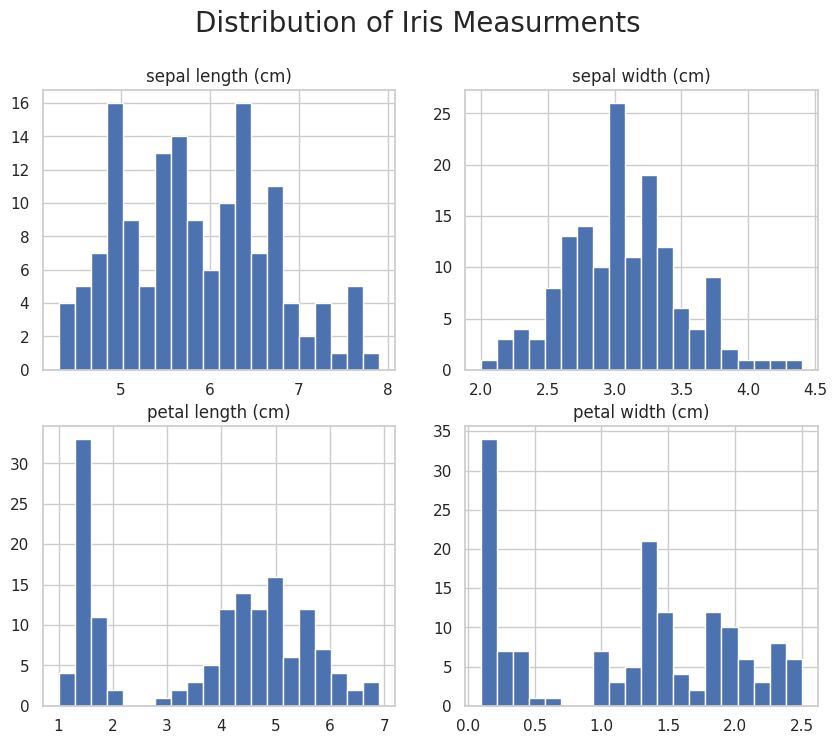

In [ ]:
plt.figure(figsize=(10,8))
plt.suptitle('Distribution of Iris Measurments',fontsize=20)

plt.subplot(2,2,1)
plt.hist(df['sepal length (cm)'],bins=20)
plt.title('sepal length (cm)')

plt.subplot(2,2,2)
plt.hist(df['sepal width (cm)'],bins=20)
plt.title('sepal width (cm)')

plt.subplot(2,2,3)
plt.hist(df['petal length (cm)'],bins=20)
plt.title('petal length (cm)')

plt.subplot(2,2,4)
plt.hist(df['petal width (cm)'],bins=20)
plt.title('petal width (cm)')

### Chart-2 : Iris Dataset Feature Relationships by Species

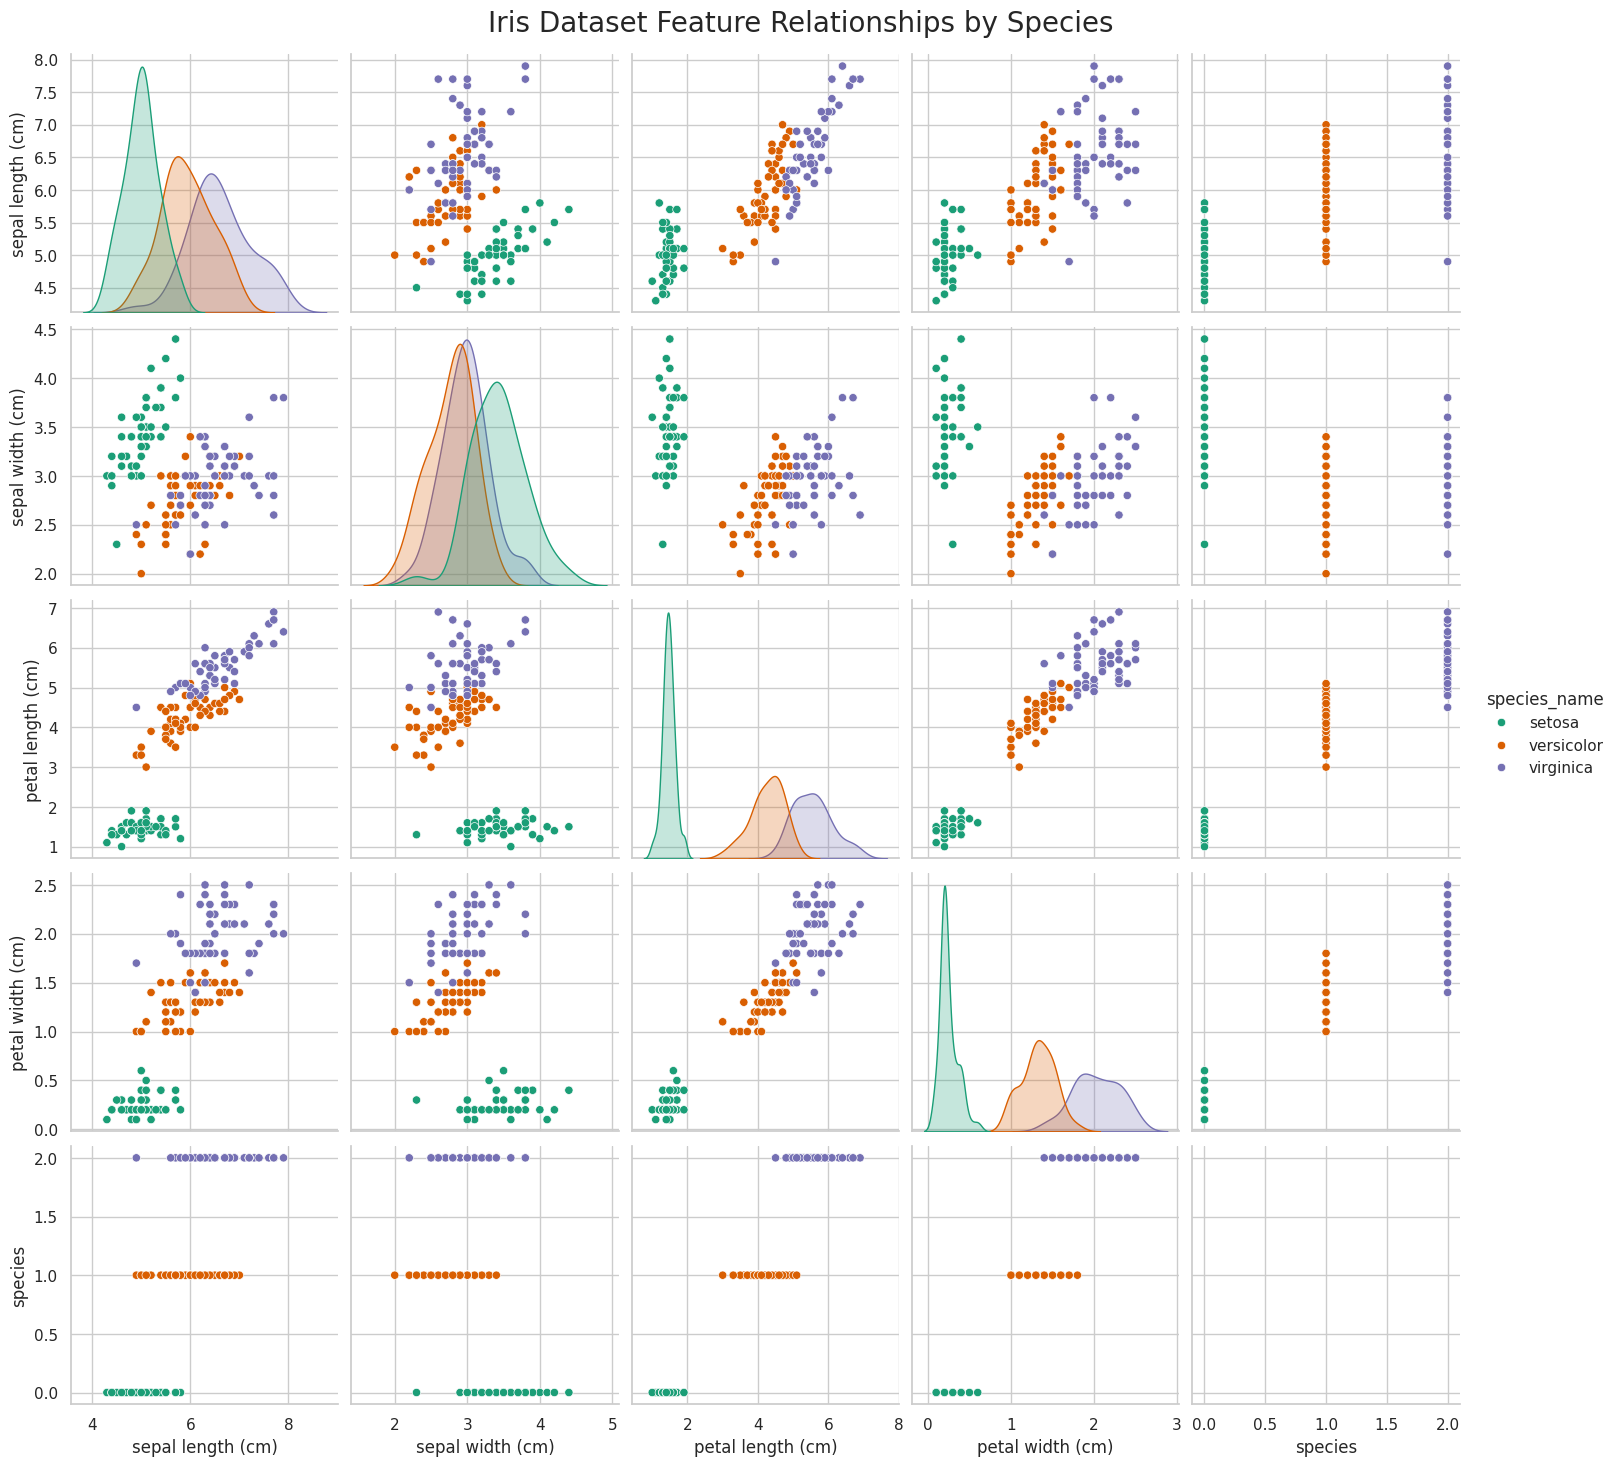

In [ ]:
# Map numeric species to names for readability
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

sns.set(style="whitegrid")
plot =sns.pairplot(
    df,
    hue='species_name',
    palette='Dark2',
    height=3
)

plot.fig.suptitle("Iris Dataset Feature Relationships by Species", fontsize=20)
plot.fig.subplots_adjust(top=0.95)  # Adjust so title doesn’t overlap the plots
plt.show()

In most scatter plots, Setosa (blue) forms a clean cluster far from the orange and green points.

Orange (Versicolor) and green (Virginica) points overlap more in most plots.

But they separate better in:

*   petal length
*   petal width

These two classes may be harder to separate, but petal features help.

Sepal features may not help as much alone — petal features look more informative.


---

1.   Setosa is easily separable
2.   Versicolor and Virginica overlap
3.   Sepal features are less powerful for separatio

### Chart-3 : Iris Dataset (Petal Length vs Petal Width) Relationships by Species

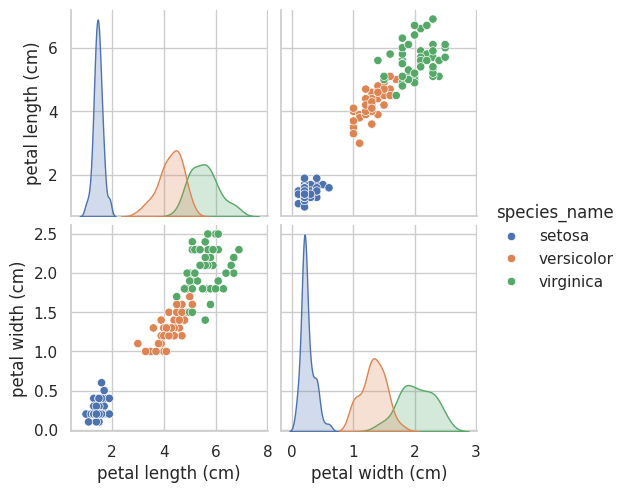

In [ ]:
sns.pairplot(df, hue='species_name', vars=['petal length (cm)', 'petal width (cm)'])
plt.show()

### Chart - 4 : Correlation Heatmap

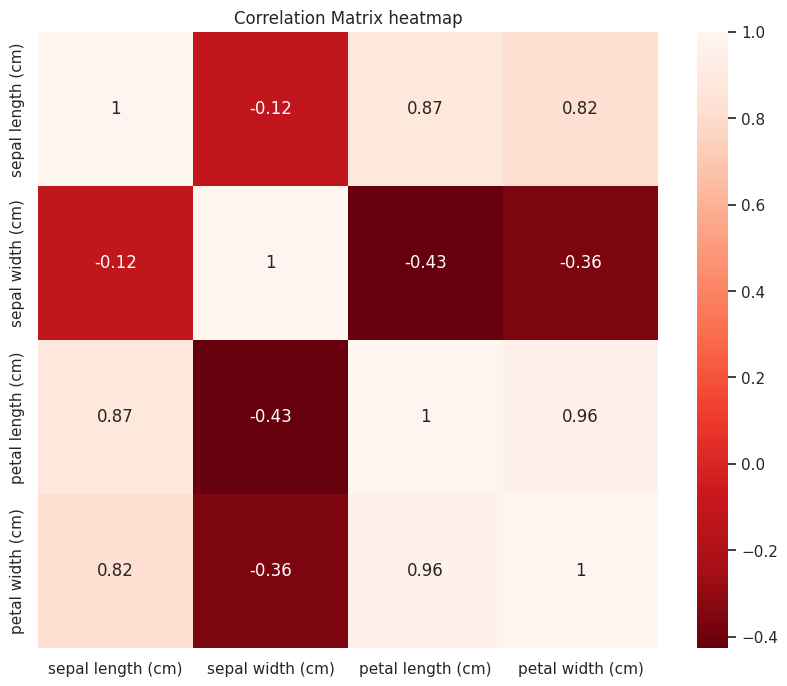

In [ ]:
corr_Matrix = df[iris.feature_names].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_Matrix, annot=True, cmap='Reds_r')

plt.title('Correlation Matrix heatmap')
plt.show()

# 3- Feature Engineering & Data Pre-processing

### 1- Data Scaling

In [ ]:
x = df.drop(columns=['species', 'species_name'],axis=1)
y = df['species']

### 2- Data Splitting

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
species,
1,41
0,40
2,38


# 4- Model Evaluation

In [ ]:
class ModelEvaluation:
  def __init__(self,class_names,model,x_train,x_test,y_train,y_test):
    self.class_names = class_names
    self.model = model
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def train(self):
    self.model.fit(self.x_train,self.y_train)

  def predict(self):
    self.y_pred_train = self.model.predict(self.x_train)
    self.y_pred_test = self.model.predict(self.x_test)

  def evaluate(self):
    self.train()
    self.predict()

  def calculate_confusion_matrix(self):
    if not hasattr(self, 'y_pred_train'):
        raise ValueError("Please run evaluate() before calculating metrics.")

    self.cm_train = confusion_matrix(self.y_train, self.y_pred_train)
    self.cm_test = confusion_matrix(self.y_test, self.y_pred_test)

  def plot_confusion_matrix(self):
    if not (hasattr(self, 'cm_train') and hasattr(self, 'cm_test')):
      raise ValueError("Please run calculate_confusion_matrix() before plotting.")


    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    self._plot_heatmap(self.cm_train, ax[0], "Train Confusion Matrix")
    self._plot_heatmap(self.cm_test, ax[1], "Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

  def _plot_heatmap(self, cm, ax, title):
    sns.heatmap(cm,
                annot=True,
                xticklabels=self.class_names,
                yticklabels=self.class_names,
                cmap="Oranges",
                fmt='.4g',
                ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(title)


  def calculate_classification_report(self):
    if not hasattr(self, 'y_pred_train'):
        raise ValueError("Please run evaluate() before calculating metrics.")

    self.cr_train = classification_report(self.y_train, self.y_pred_train, output_dict=True)
    self.cr_test = classification_report(self.y_test, self.y_pred_test, output_dict=True)
    self.crt_train_df = pd.DataFrame(self.cr_train).T
    self.crt_test_df = pd.DataFrame(self.cr_test).T


  def calculate_metrics(self):
    if not hasattr(self, 'cr_train'):
        raise ValueError("Please run calculate_classification_report() before calculating metrics.")

    self.precision_train = self.cr_train['weighted avg']['precision']
    self.precision_test = self.cr_test['weighted avg']['precision']
    self.recall_train = self.cr_train['weighted avg']['recall']
    self.recall_test = self.cr_test['weighted avg']['recall']
    self.F1_train = self.cr_train['weighted avg']['f1-score']
    self.F1_test = self.cr_test['weighted avg']['f1-score']

  def calculate_accuracy(self):
    if not hasattr(self, 'y_pred_train'):
      raise ValueError("Please run evaluate() before calculating metrics.")

    self.acc_train = accuracy_score(y_true = self.y_train, y_pred = self.y_pred_train)
    self.acc_test = accuracy_score(y_true = self.y_test, y_pred = self.y_pred_test)

  def calculate_roc_auc(self):
    raise NotImplementedError("ROC AUC is not yet implemented.")

  def calculate_model_score(self):
    self.calculate_classification_report()
    self.calculate_metrics()
    self.calculate_accuracy()

    self.model_score =[self.precision_train, self.precision_test, self.recall_train, self.recall_test, self.acc_train, self.acc_test, self.F1_train, self.F1_test]

# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

# ML Model - 1 : Logistic regression

In [ ]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

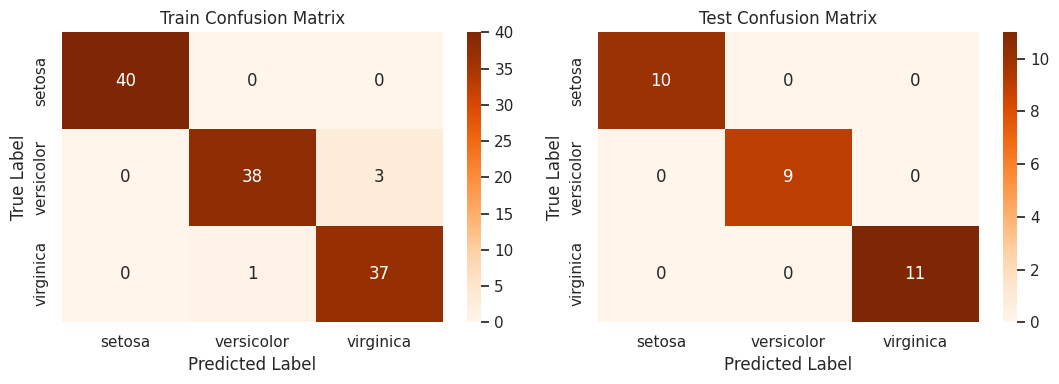

In [ ]:
model_1 = ModelEvaluation(class_names=iris.target_names, model=lr_model, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_1.evaluate()                     # Fit + predict
model_1.calculate_confusion_matrix()   # Generate matrices
model_1.plot_confusion_matrix()        # Plot them
model_1.calculate_model_score()        # Generate metrics + reports


In [ ]:
score['Logistic regression'] = model_1.model_score
score

,Logistic regression
Precision Train,0.967216
Precision Test,1.000000
Recall Train,0.966387
Recall Test,1.000000
Accuracy Train,0.966387
Accuracy Test,1.000000
F1 macro Train,0.966397
F1 macro Test,1.000000
